In [1]:
!pip install pandas matplotlib seaborn

In [14]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel(next(iter(uploaded)))
print("Dataset loaded successfully!")

df.head()


Saving movies_updated_data.xlsx to movies_updated_data (2).xlsx
Dataset loaded successfully!


,adult,budget,genres,id,imdb_id,original_language,title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,False,1000.0,Comedy,15128,tt1000111256,en,Speechless,A romantic comedy. Michael Keaton and Geena Da...,2.334226,/nN5BPaG721000jhkNf29Pogm1O1mq4.jpg,...,United States of America,1994-12-16 00:00:00,1000.0,99,English,Released,There are two sides to every relationship... D...,False,5.5,24
1,False,1000.0,Comedy,26141,tt1000110006873,en,Fatal Instinct,A spoof of the late 81000s and early 91000s su...,3.555139,/sZDp3eHwujNR71aNU1000rLDz7phJA.jpg,...,United States of America,29/11000/1993,1000.0,91,English,Released,"Sex, murder and revenge were never this funny.",False,5.4,37
2,False,1000.0,Comedy,18862,tt1000116571,en,House Arrest,High-schooler Grover Beindorf and his younger ...,12.297782,/mhvhcOqAlRnB5taKdhDznNay9zF.jpg,...,United States of America,14/10008/1996,1000.0,110008,English,Released,There's More Than One Way To Keep A Marriage T...,False,5.0,32
3,False,1000.0,Comedy,981,tt1000100032910004,en,The Philadelphia Story,Philadelphia heiress Tracy Lord throws out her...,8.888100,/xfwTdXCDUZffpzPsPaMrTSnBsSy.jpg,...,United States of America,10005/12/1941000,1000.0,112,English,Released,Broadway's howling year-run comedy hit of the ...,False,7.7,196
4,False,1000.0,Comedy,17281,tt1000100051658,en,Gigi,"A home, a motorcar, servants, the latest fashi...",11000.363110,/6KDECdxWvQc9wRsFvYo9fSHo4Jh.jpg,...,United States of America,15/10004/1958,1000.0,116,English,Released,Thank heaven for Gigi,False,6.1,68


In [15]:
print("Dataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 17230 non-null  bool   
 1   budget                17230 non-null  float64
 2   genres                17230 non-null  object 
 3   id                    17230 non-null  int64  
 4   imdb_id               17228 non-null  object 
 5   original_language     17230 non-null  object 
 6   title                 17230 non-null  object 
 7   overview              17230 non-null  object 
 8   popularity            17230 non-null  float64
 9   poster_path           17230 non-null  object 
 10  production_companies  17230 non-null  object 
 11  production_countries  17230 non-null  object 
 12  release_date          17229 non-null  object 
 13  revenue               17230 non-null  float64
 14  runtime               17230 non-null  int64  
 15  spoke

In [16]:
genre_revenue = df.groupby('genres')['revenue'].sum().reset_index()

genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

print("\nTotal Revenue by Genre:")
print(genre_revenue.head())



Total Revenue by Genre:
             genres       revenue
1         Adventure  3.310925e+32
3            Comedy  2.206938e+32
0            Action  1.656329e+30
15  Science Fiction  1.334003e+30
6             Drama  1.285999e+30


In [44]:
import plotly.express as px

genre_popularity = df.groupby('genres')['popularity'].mean().reset_index()
genre_popularity = genre_popularity.sort_values('popularity', ascending=False)

fig = px.funnel(genre_popularity, x='popularity', y='genres', title="Popularity by Genre")

fig.update_traces(marker=dict(color='purple'), textinfo='value+percent previous')

fig.show()


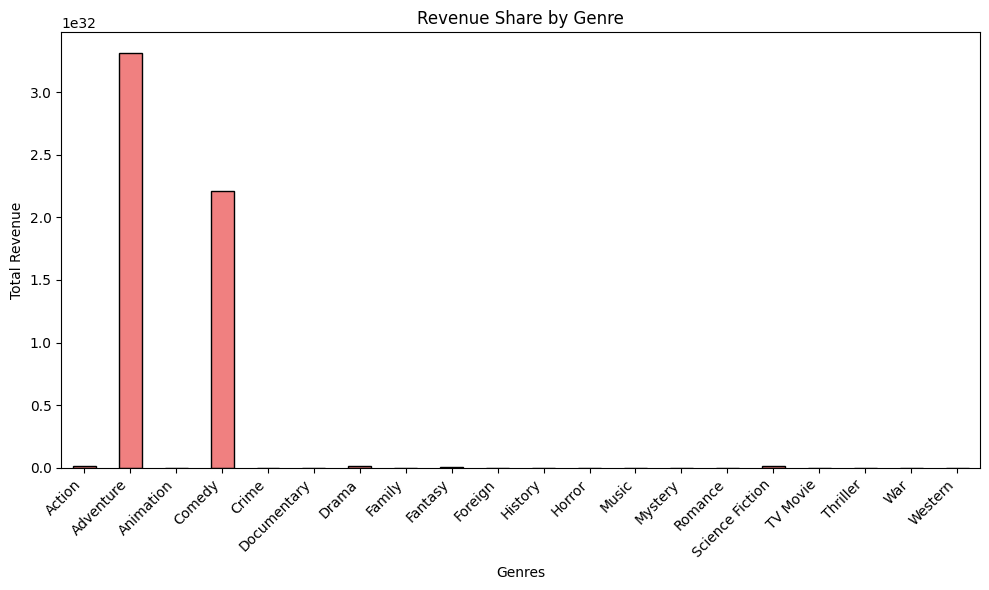

In [39]:
import matplotlib.pyplot as plt

genre_revenue = df.groupby(['genres'])['revenue'].sum()

plt.figure(figsize=(10, 6))
genre_revenue.plot(kind='bar', stacked=True, color='lightcoral', edgecolor='black')
plt.title('Revenue Share by Genre')
plt.xlabel('Genres')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


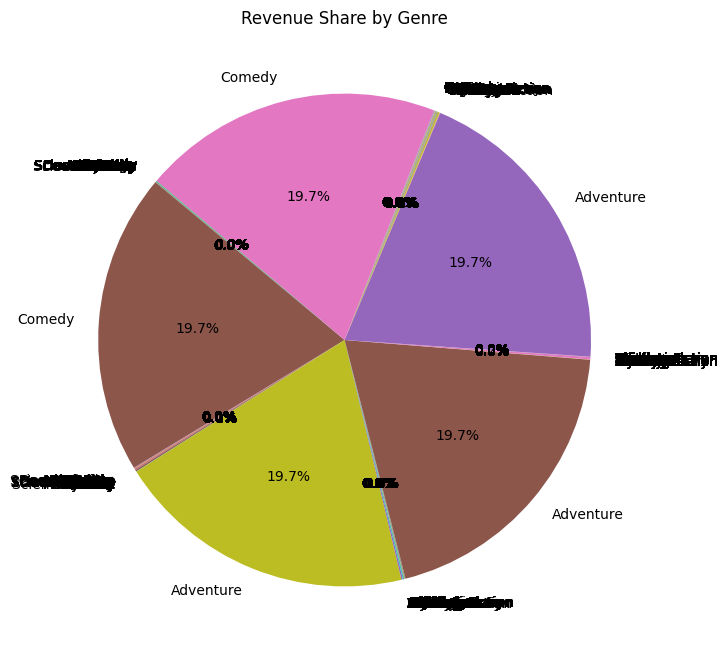

In [47]:
# Plot revenue share by genre
plt.figure(figsize=(8, 8))
plt.pie(df['revenue'], labels=df['genres'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Genre')
plt.show()
